# Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import ast

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from scipy import stats
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import feature_selection
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

import re
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.ensemble import GradientBoostingRegressor

import warnings 

from IPython.display import display, HTML

warnings.filterwarnings("ignore")

plt.rcParams["patch.force_edgecolor"] = True

# 1. Чтение исходных данных

In [2]:
data = pd.read_csv("./data/data.csv")
print('Data shape: {}'.format(data.shape))
data.head(5)

Data shape: (377185, 18)


,status,private pool,propertyType,street,baths,homeFacts,fireplace,city,schools,sqft,zipcode,beds,state,stories,mls-id,PrivatePool,MlsId,target
0,Active,NaN,Single Family Home,240 Heather Ln,3.5,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",Gas Logs,Southern Pines,"[{'rating': ['4', '4', '7', 'NR', '4', '7', 'N...",2900,28387,4,NC,NaN,NaN,NaN,611019,"$418,000"
1,for sale,NaN,single-family home,12911 E Heroy Ave,3 Baths,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",NaN,Spokane Valley,"[{'rating': ['4/10', 'None/10', '4/10'], 'data...","1,947 sqft",99216,3 Beds,WA,2.0,NaN,NaN,201916904,"$310,000"
2,for sale,NaN,single-family home,2005 Westridge Rd,2 Baths,"{'atAGlanceFacts': [{'factValue': '1961', 'fac...",yes,Los Angeles,"[{'rating': ['8/10', '4/10', '8/10'], 'data': ...","3,000 sqft",90049,3 Beds,CA,1.0,NaN,yes,FR19221027,"$2,895,000"
3,for sale,NaN,single-family home,4311 Livingston Ave,8 Baths,"{'atAGlanceFacts': [{'factValue': '2006', 'fac...",yes,Dallas,"[{'rating': ['9/10', '9/10', '10/10', '9/10'],...","6,457 sqft",75205,5 Beds,TX,3.0,NaN,NaN,14191809,"$2,395,000"
4,for sale,NaN,lot/land,1524 Kiscoe St,NaN,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",NaN,Palm Bay,"[{'rating': ['4/10', '5/10', '5/10'], 'data': ...",NaN,32908,NaN,FL,NaN,NaN,NaN,861745,"$5,000"


Предоставлен дата-сет, насчитывающий 18 признаков и 377185 записей.

# 2. Первоначальный аналз данных

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377185 entries, 0 to 377184
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   status        337267 non-null  object
 1   private pool  4181 non-null    object
 2   propertyType  342452 non-null  object
 3   street        377183 non-null  object
 4   baths         270847 non-null  object
 5   homeFacts     377185 non-null  object
 6   fireplace     103115 non-null  object
 7   city          377151 non-null  object
 8   schools       377185 non-null  object
 9   sqft          336608 non-null  object
 10  zipcode       377185 non-null  object
 11  beds          285903 non-null  object
 12  state         377185 non-null  object
 13  stories       226470 non-null  object
 14  mls-id        24942 non-null   object
 15  PrivatePool   40311 non-null   object
 16  MlsId         310305 non-null  object
 17  target        374704 non-null  object
dtypes: object(18)
memory usa

In [4]:
for i in data.columns:
    display(i)
    display(data[i].value_counts())

'status'

for sale                156104
Active                  105207
For sale                 43465
foreclosure               6426
New construction          5475
                         ...  
Contingent   No Show         1
Coming soon: Oct 24.         1
Coming soon: Oct 21.         1
Coming soon: Nov 14.         1
Coming soon: Dec 23.         1
Name: status, Length: 159, dtype: int64

'private pool'

Yes    4181
Name: private pool, dtype: int64

'propertyType'

single-family home                                             92206
Single Family                                                  62869
Single Family Home                                             31728
condo                                                          25968
lot/land                                                       20552
                                                               ...  
Custom, Elevated, Other                                            1
Contemporary, Farmhouse                                            1
2 Stories, Traditional, Mediterranean, Texas Hill Country          1
1 Story, Contemporary, Traditional, Mediterranean                  1
Bilevel, Converted Dwelling, Loft with Bedrooms, Condo/Unit        1
Name: propertyType, Length: 1280, dtype: int64

'street'

Address Not Disclosed      672
Undisclosed Address        517
(undisclosed Address)      391
Address Not Available      175
Unknown Address             72
                          ... 
16061 SW 144th Ct            1
1721 Deans Crossing Ln       1
20 Pigeon Trl                1
17438 Chase St               1
5983 Midcrown Dr             1
Name: street, Length: 337076, dtype: int64

'baths'

2 Baths       52466
3 Baths       35506
2             20452
2.0           16576
4 Baths       14764
              ...  
4.75 Baths        1
5.25 Baths        1
41.0              1
1.8 Baths         1
44.0              1
Name: baths, Length: 229, dtype: int64

'homeFacts'

{'atAGlanceFacts': [{'factValue': '', 'factLabel': 'Year built'}, {'factValue': '', 'factLabel': 'Remodeled year'}, {'factValue': '', 'factLabel': 'Heating'}, {'factValue': '', 'factLabel': 'Cooling'}, {'factValue': '', 'factLabel': 'Parking'}, {'factValue': '—', 'factLabel': 'lotsize'}, {'factValue': None, 'factLabel': 'Price/sqft'}]}                                                        7174
{'atAGlanceFacts': [{'factValue': None, 'factLabel': 'Year built'}, {'factValue': None, 'factLabel': 'Remodeled year'}, {'factValue': None, 'factLabel': 'Heating'}, {'factValue': None, 'factLabel': 'Cooling'}, {'factValue': None, 'factLabel': 'Parking'}, {'factValue': None, 'factLabel': 'lotsize'}, {'factValue': None, 'factLabel': 'Price/sqft'}]}                                             3532
{'atAGlanceFacts': [{'factValue': '', 'factLabel': 'Year built'}, {'factValue': '', 'factLabel': 'Remodeled year'}, {'factValue': '', 'factLabel': 'Heating'}, {'factValue': '', 'factLabel': 'Cooling'}, {'

'fireplace'

yes                                                                     50356
Yes                                                                     20856
1                                                                       14544
2                                                                        2432
Not Applicable                                                           1993
                                                                        ...  
Free-standing, Insert, Wood                                                 1
Wood Burning, Attached Fireplace Doors/Screen, Electric, Gas Starter        1
One, Living Room                                                            1
FAMILYRM, Great Room, Living Room                                           1
Ceiling Fan, SMAPL, Utility Connection, Walk-In Closets                     1
Name: fireplace, Length: 1653, dtype: int64

'city'

Houston            24442
San Antonio        15592
Miami              15524
Jacksonville       10015
Dallas              8856
                   ...  
New Albany             1
Los Altos Hills        1
Lake worth             1
Lisle                  1
Blue Springs           1
Name: city, Length: 2026, dtype: int64

'schools'

[{'rating': [], 'data': {'Distance': [], 'Grades': []}, 'name': []}]                                                                                                                                                                                4204
[{'rating': ['4/10', '5/10', '6/10'], 'data': {'Distance': ['39.69mi', '39.69mi', '39.69mi'], 'Grades': ['9-12', '6-8', 'PK-5']}, 'name': ['Fort Hancock High School', 'Fort Hancock Middle School', 'Benito Martinez Elementary School']}]          222
[{'rating': ['4/10', '6/10', '3/10'], 'data': {'Distance': ['3.62mi', '3.62mi', '3.62mi'], 'Grades': ['6-8', 'PK-5', '9-12']}, 'name': ['Horizon Middle School', 'Desert Hills Elementary School', 'Horizon High School']}]                          168
[{'rating': ['5/10', '3/10', '5/10'], 'data': {'Distance': ['9.71mi', '8.92mi', '1.56mi'], 'Grades': ['5-8', '9-12', 'K-4']}, 'name': ['Cheatham Middle School', 'Cheatham Co Central', 'West Cheatham Elementary School']}]                         133
[{'r

'sqft'

0                                          11854
1,200 sqft                                   839
1,000 sqft                                   654
1,100 sqft                                   573
1,800 sqft                                   563
                                           ...  
9,914                                          1
Total interior livable area: 3,055 sqft        1
5,177                                          1
11620                                          1
Total interior livable area: 4,615 sqft        1
Name: sqft, Length: 25405, dtype: int64

'zipcode'

32137         2141
33131         1563
34747         1488
78245         1390
34759         1333
              ... 
27613-4237       1
43054            1
41630            1
27615-3709       1
64015            1
Name: zipcode, Length: 4549, dtype: int64

'beds'

3 Beds         53459
4 Beds         35418
3              31406
2 Beds         26362
4              20030
               ...  
8,023 sqft         1
10,193 sqft        1
8.93 acres         1
5,510 sqft         1
8,479 sqft         1
Name: beds, Length: 1184, dtype: int64

'state'

FL    115449
TX     83786
NY     24479
CA     23386
NC     21862
TN     18340
WA     13826
OH     12588
IL      8939
NV      8482
GA      6705
CO      6404
PA      5561
MI      5161
DC      4674
AZ      3347
IN      3328
OR      2789
MA      1516
UT      1325
MD      1090
VT       868
MO       866
VA       801
WI       452
NJ       436
ME       259
IA       242
KY        90
OK        49
MS        40
SC        28
MT         7
DE         5
Fl         1
BA         1
AL         1
OT         1
OS         1
Name: state, dtype: int64

'stories'

1.0                                  67454
2.0                                  55283
1                                    23086
2                                    18146
3.0                                  11275
                                     ...  
Manufactured Home, Non-Site Built        1
Bedroom - Split Plan                     1
78                                       1
One, Two, Multi/Split                    1
65.0                                     1
Name: stories, Length: 348, dtype: int64

'mls-id'

No MLS#      3
No           3
1498550      2
39888954     2
608063       2
            ..
1020314      1
A10762436    1
1592770      1
14201834     1
F10202858    1
Name: mls-id, Length: 24907, dtype: int64

'PrivatePool'

yes    28793
Yes    11518
Name: PrivatePool, dtype: int64

'MlsId'

NO MLS                     24
No MLS #                   16
 A, Houston, TX 77008      13
 12A, Orlando, FL 32833    11
 B, Houston, TX 77008       9
                           ..
19092240                    1
RX-10563061                 1
218080001                   1
14154778                    1
10374233                    1
Name: MlsId, Length: 232944, dtype: int64

'target'

$225,000     1462
$275,000     1355
$250,000     1312
$350,000     1296
$299,900     1276
             ... 
$390,359        1
$458,900+       1
274,359         1
$273,490+       1
$171,306        1
Name: target, Length: 43939, dtype: int64

In [5]:
data.describe()

,status,private pool,propertyType,street,baths,homeFacts,fireplace,city,schools,sqft,zipcode,beds,state,stories,mls-id,PrivatePool,MlsId,target
count,337267,4181,342452,377183,270847,377185,103115,377151,377185,336608,377185,285903,377185,226470,24942,40311,310305,374704
unique,159,1,1280,337076,229,321009,1653,2026,297365,25405,4549,1184,39,348,24907,2,232944,43939
top,for sale,Yes,single-family home,Address Not Disclosed,2 Baths,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",yes,Houston,"[{'rating': [], 'data': {'Distance': [], 'Grad...",0,32137,3 Beds,FL,1.0,No MLS#,yes,NO MLS,"$225,000"
freq,156104,4181,92206,672,52466,7174,50356,24442,4204,11854,2141,53459,115449,67454,3,28793,24,1462


При первоначальном анализе структуры данных бросается в глаза достаточно плохое качесвто дата-сета: много пропусков, некторые столбцы по сути задваиваются, есть столбцы со сложной структурой, что требует дополнительные дейтсвтия по выгрузке из них полезной для модели информации.

# 3. Обработка данных и проектирование признаков.

In [6]:
# Два дублирующих друг друга столбца с информацией о бассайне объединяем в один. Указана информация о наличии бассейна, заменяем NaN на jncencndbt ,fcctqyf
def get_pool(df):
    if df['private pool'] == 'Yes' or df['PrivatePool'] == 'Yes' or df['PrivatePool'] == 'yes':
        return 1
    else: return 0
    
data['pool'] = data.loc[:, ['private pool', 'PrivatePool']].apply(get_pool, axis=1)

In [7]:
# Выбираем наиболее распространенные статусы для дальнейшего кодирования
data['status'] = data['status'].apply(lambda x: 'For sale' if x == 'for sale' else x)
data['status'] = data['status'].apply(lambda x: 'Active' if x == 'A Active' else x)
data['status'] = data['status'].apply(lambda x: 'Active' if x == 'Active With Offer' else x)
data['status'] = data['status'].apply(lambda x: 'foreclosure' if x == 'Foreclosed' else x)
data['status'] = data['status'].apply(lambda x: 'foreclosure' if x == 'Foreclosure' else x)
data['status'] = data['status'].apply(lambda x: 'Pre-foreclosure' if x == 'Pre-foreclosure / auction' else x)
data['status'] = data['status'].apply(lambda x: 'New construction' if x == 'New' else x)
data['status'] = data['status'].apply(lambda x: 'NPending' if x == 'P' else x)
data['status'] = data['status'].apply(lambda x: 'Under Contract Show' if x == 'Under Contract   Showing' else x)
data['status'] = data['status'].apply(lambda x: 'Under Contract Show' if x == 'Under Contract' else x)
data['status'] = data['status'].apply(lambda x: 'Under Contract Show' if x == 'Active Under Contract' else x)
data['status'] = data['status'].apply(lambda x: 'Auction' if x == ' / auction' else x)
data['status'] = data['status'].apply(lambda x: 'Auction' if x == 'Auction - Active' else x)
data['status'] = data['status'].apply(lambda x: 'Pending' if x == 'pending' else x)
data['status'] = data['status'].apply(lambda x: 'Pending' if x == 'NPending' else x)

In [8]:
# Вытаскиваем информацию о количестве лестниц из описания типа здания. Используем в дальнейшем с соответствующим столбцом
def get_story_temp(propertyType):
    one_story = ['1 story', 'one story']
    two_stories = ['2 stories', 'two story', 'two stories', '2 story']
    three_stories = ['3 stories', 'three story', 'three stories', '3 story']
    
    propertyType = str(propertyType)
    
    for i in one_story:
        if i in propertyType.lower():
            return 1
    for i in two_stories:
        if i in propertyType.lower():
            return 2
    for i in three_stories:
        if i in propertyType.lower():
            return 3
    
    return 'nan'

data['story_temp'] = data['propertyType'].apply(get_story_temp)

In [9]:
# Обработка осноного столбца с информацией о лестницах
def get_stories(stories):
    except_list = ['story', 'stories', 'level', 'built', 'or', 'house', 'story/basement', 'levels']
    stop_list = ['--',
                 '',
                 'site',
                 'multi/split',
                 'condominium',
                 'stories/levels',
                 'lot',
                 'farm',
                 'sub',
                 'townhouse',
                 'traditional',
                 'acreage',
                 'foyer',
                 'split',
                 'basement',
                 'multi-level',
                 'multi/split',
                 'multi-unit',
                 'ranch',
                 'story/ranch',
                 'high-rise',
                 'mid-rise',
                 'detached',
                 'half',
                 '1/2',
                 'story/f.r.o.g.',
                 'commercial',
                 'fourplex',
                 'doublewide',
                 'mobile',
                 'cabin/cottage',
                 'victorian',
                 '3-4',
                 'contemporary',
                 'garden',
                 'cod',
                 'dwelling',
                 'home',
                 'multi',
                 'non-site',
                 'bldg',
                 'condo',
                 'bungalow',
                 'multi-story',
                 'co-op',
                 'singlewide',
                 'loft',
                 'duplex',
                 'ground',
                 'plan',
                 '1-2',
                 'englander',
                 'sixplex',
                 'quad',
                 '3plex',
                 'frame',
                 'tudor',
                 'colonial',
                 'hillside',
                 'live/work',
                 'apartments',
                 'style',
                 'craftsman',
                 'down',
                 'log',
                 'federal',
                 'chalet',
                 'wide'
    ]
    
    stories = str(stories)
    
    stories = stories.replace(' More', '')
    
    stories = stories.split(' ')
    story_number = stories[-1]

    if story_number.lower() in stop_list:
        story_number = 'nan'
    
    if story_number.lower() in except_list:
        story_number= stories[-2]
        
    if story_number.lower() in except_list:
        story_number= stories[-3]  
    
    story_number = story_number.replace('+', '')
    story_number = story_number.replace(',', '.')
    story_number = story_number.replace('One', '1')
    story_number = story_number.replace('Two', '2')
    story_number = story_number.replace('Three', '3')
    story_number = story_number.replace('Ranch/', '')
    story_number = story_number.replace('Tri', '3')
    story_number = story_number.replace('Tri-Level', '3')
    story_number = story_number.replace('Bi-Level', '2')
    story_number = story_number.replace('None', '0')
    story_number = story_number.replace('(2)', '2')
    story_number = story_number.replace('3-Level', '3')
    story_number = story_number.replace('3/Multi', '3')
    
    if story_number.lower() in stop_list:
        story_number = 'nan'
        
    if story_number == 'nan':
        return story_number
    else:
        story_number = int(round(float(story_number),0))
    return story_number

data['story_number'] = data['stories'].apply(get_stories)

# Объединяем данные о лестницах
def get_final_story_number(df):
    if df['story_number'] == 'nan':
        return df['story_temp']
    else: return df['story_number']
    
data['final_story_number'] = data.loc[:, ['story_number', 'story_temp']].apply(get_final_story_number, axis=1)

In [10]:
# Многие типы пересекаются друг с другом по ключевым строкам, поэтому лучший результат получился разобрать это вручную
data['propertyType'] = data['propertyType'].apply(lambda x: 'Single Family' if x == 'single-family home' else x)
data['propertyType'] = data['propertyType'].apply(lambda x: 'Single Family' if x == 'Single Family Home' else x)
data['propertyType'] = data['propertyType'].apply(lambda x: 'Single Family' if x == 'Detached, One Story' else x)
data['propertyType'] = data['propertyType'].apply(lambda x: 'Single Family' if x == 'Single Detached, Traditional' else x)
data['propertyType'] = data['propertyType'].apply(lambda x: 'Single Family' if x == '1 Story' else x)
data['propertyType'] = data['propertyType'].apply(lambda x: 'Single Family' if x == '2 Stories' else x)
data['propertyType'] = data['propertyType'].apply(lambda x: 'Single Family' if x == 'Single Detached' else x)
data['propertyType'] = data['propertyType'].apply(lambda x: 'Single Family' if x == 'Detached, Two Story' else x)
data['propertyType'] = data['propertyType'].apply(lambda x: 'Single Family' if x == 'One Story' else x)
data['propertyType'] = data['propertyType'].apply(lambda x: 'Single Family' if x == 'Two Story' else x)
data['propertyType'] = data['propertyType'].apply(lambda x: 'Single Family' if x == '2 Story' else x)
data['propertyType'] = data['propertyType'].apply(lambda x: 'Single Family' if x == '2 Stories, Traditional' else x)
data['propertyType'] = data['propertyType'].apply(lambda x: 'Single Family' if x == '1 Story, Traditional' else x)
data['propertyType'] = data['propertyType'].apply(lambda x: 'Single Family' if x == 'SingleFamilyResidence' else x)
data['propertyType'] = data['propertyType'].apply(lambda x: 'Single Family' if x == 'Single Detached, Contemporary/Modern' else x)
data['propertyType'] = data['propertyType'].apply(lambda x: 'Single Family' if x == '2 Stories, Contemporary' else x)
data['propertyType'] = data['propertyType'].apply(lambda x: 'Single Family' if x == '1 Story, Contemporary' else x)
data['propertyType'] = data['propertyType'].apply(lambda x: 'Single Family' if x == 'Detached' else x)

data['propertyType'] = data['propertyType'].apply(lambda x: 'Condo' if x == 'condo' else x)
data['propertyType'] = data['propertyType'].apply(lambda x: 'Condo' if x == 'Condo/Townhome, Traditional' else x)
data['propertyType'] = data['propertyType'].apply(lambda x: 'Condo' if x == 'Condo/Townhome' else x)
data['propertyType'] = data['propertyType'].apply(lambda x: 'Condo' if x == 'Condo/Townhome, Contemporary/Modern' else x)
data['propertyType'] = data['propertyType'].apply(lambda x: 'Condo' if x == 'Condo/Townhome/Row Home/Co-Op' else x)
data['propertyType'] = data['propertyType'].apply(lambda x: 'Condo' if x == 'Condominium (Single Level), Contemporary' else x)
data['propertyType'] = data['propertyType'].apply(lambda x: 'Condo' if x == 'Condominium (Single Level)' else x)
data['propertyType'] = data['propertyType'].apply(lambda x: 'Condo' if x == 'Condo/Unit' else x)

data['propertyType'] = data['propertyType'].apply(lambda x: 'Mobile / Manufactured' if x == 'mobile/manufactured' else x)
data['propertyType'] = data['propertyType'].apply(lambda x: 'Mobile / Manufactured' if x == 'Mfd/Mobile Home' else x)

data['propertyType'] = data['propertyType'].apply(lambda x: 'Multi Family' if x == 'multi-family' else x)
data['propertyType'] = data['propertyType'].apply(lambda x: 'Multi Family' if x == 'Multi-Family Home' else x)
data['propertyType'] = data['propertyType'].apply(lambda x: 'Multi Family' if x == 'Multiple Occupancy' else x)

data['propertyType'] = data['propertyType'].apply(lambda x: 'Townhouse' if x == 'townhouse' else x)
data['propertyType'] = data['propertyType'].apply(lambda x: 'Townhouse' if x == 'Townhouse, Modern' else x)

data['propertyType'] = data['propertyType'].apply(lambda x: 'Cooperative' if x == 'coop' else x)
data['propertyType'] = data['propertyType'].apply(lambda x: 'Apartment' if x == 'apartment' else x)

data['propertyType'] = data['propertyType'].apply(lambda x: 'Ranch' if x == 'Farms/Ranches' else x)
data['propertyType'] = data['propertyType'].apply(lambda x: 'Ranch' if x == 'Ranch, Traditional' else x)
data['propertyType'] = data['propertyType'].apply(lambda x: 'Ranch' if x == 'Single Detached, Ranch' else x)
data['propertyType'] = data['propertyType'].apply(lambda x: 'Ranch' if x == 'Ranch, One Story' else x)
data['propertyType'] = data['propertyType'].apply(lambda x: 'Ranch' if x == 'Detached, Ranch, One Story' else x)

property_type_list = ['Single Family',
                      'Condo',
                      'lot/land',
                      'Townhouse',
                      'Multi Family',
                      'Land',
                      'Cooperative',
                      'Mobile / Manufactured',
                      'Ranch',
                      'High Rise',
                      'Contemporary',
                      'Colonial',
                      'Contemporary/Modern'
]

In [11]:
# Многие типы пересекаются друг с другом по ключевым строкам, поэтому лучший результат получился разобрать это вручную
data['street'] = data['street'].apply(lambda x: 'Unknown Address' if x == 'Address Not Disclosed' else x)
data['street'] = data['street'].apply(lambda x: 'Unknown Address' if x == 'Undisclosed Address' else x)
data['street'] = data['street'].apply(lambda x: 'Unknown Address' if x == '(undisclosed Address)' else x)
data['street'] = data['street'].apply(lambda x: 'Unknown Address' if x == 'Address Not Available' else x)

def get_street_type(address):
    address = str(address)
    street_type_list = ['St',
                    'Dr',
                    'Ave',
                    'Rd',
                    'Ln',
                    'Ct',
                    'Pl',
                    'Way',
                    'Cir',
                    'Blvd',
                    'Ter',
                    'Trl',
                    'Loop',
]
    if address == 'Unknown Address': return 'Unknown Address'
    
    for i in street_type_list:
        if i in address:
            return i


data['street_type'] = data['street'].apply(get_street_type)

street_type_list = ['St',
                    'Dr',
                    'Ave',
                    'Rd',
                    'Ln',
                    'Ct',
                    'Pl',
                    'Way',
                    'Cir',
                    'Blvd',
                    'Ter',
                    'Trl',
                    'Loop'
]

data['street_type'] = data['street_type'].apply(lambda x: x if x in street_type_list else 'Other')

In [12]:
# Обрабатываем информацию о количестве ванных комнат
def get_bath(bath):
    except_list = ['bath', 'baths', 'ba']
    stop_list = ['--', '~', '', '—', 'SemiMod']
    compose_list = ['2-2', '1-1', '1-0', '1-2']
    
    bath = str(bath)
    bath = bath.split(' ')
    bath_number = bath[-1]

    
    if bath_number in stop_list:
        bath_number = 'nan'
    
    if bath_number.lower() in except_list:
        bath_number= bath[-2]
    
    bath_number = bath_number.replace('+', '')
    bath_number = bath_number.replace(',', '.')
    
    if bath_number in compose_list:
        bath_number = int(bath_number[0]) + int(bath_number[-1])
    
    if bath_number in stop_list:
        bath_number = 'nan'
        
    if bath_number == 'nan':
        return bath_number
    else:
        bath_number = int(round(float(bath_number),0))
    return bath_number

data['baths_number'] = data['baths'].apply(get_bath)

In [13]:
# Обрабатываем информацию о количестве каминов
not_fireplace_list = ['Not Applicable', 'No', '0', 'N/K']

data['fireplace'] = data['fireplace'].fillna('nan')

def get_fireplace(fireplace):
    if fireplace == 'nan':
        return 'nan'
    elif fireplace in not_fireplace_list:
        return 0
    else: return 1
data['fireplace'] = data['fireplace'].apply(get_fireplace)

In [14]:
# Обрабатываем информацию о площади здания
def get_sq(sqft):
    except_list = ['sqft']
    
    sqft = str(sqft)
    sqft = sqft.replace(',', '')
    sqft = sqft.replace('--', 'nan')
    
    sqft = sqft.split(' ')
    sq = sqft[-1]
    
    if sq.lower() in except_list:
        sq = sqft[-2]
        
    if sq == 'nan':
        return sq
    elif sq.isnumeric():
        sq = int(sq)
    else:
        return 'nan'
    
    return sq

data['sq'] = data['sqft'].apply(get_sq)


In [15]:
# Создаем новый признак - Тип (размер) города
def get_city_type(city):
    huge_cities_list = ['New York', 'Los Angeles', 'Chicago', 'Houston'] # города США с населением более 2 млн чел.
    big_cities_list = ['Phoenix',
                       'Philadelphia',
                       'San Antonio',
                       'San Diego',
                       'Dallas',
                       'San Jose',
                       'Austin',
                       'Jacksonville',
                       'Fort Worth',
                       'Columbus',
                       'Indianapolis',
                       'Charlotte',
                       'San Francisco',
                       'Seattle',
                       'Denver',
                       'Oklahoma City',
                       'Nashville',
                       'El Paso',
                       'Washington',
                       'Boston',
                       'Las Vegas',
                       'Portland',
                       'Detroit',
                       'Louisville',
                       'Memphis',
                       'Baltimore',
                       'Milwaukee',
                       'Albuquerque',
                       'Fresno',
                       'Tucson',
                       'Sacramento',
                       'Mesa',
                       'Kansas City',
                       'Atlanta',
                       'Omaha',
                       'Colorado Springs',
                       'Raleigh',
                       'Virginia Beach',
                       'Long Beach',
                       'Miami',
                       'Oakland',
                       'Minneapolis',
                       'Tulsa',
                       'Bakersfield'
    ] # города США с населением более 400 тыс. чел.
    
    if city in huge_cities_list:
        return city
    elif city in big_cities_list:
        return 'Big city'
    else:
        return "Small city"

data['city_type'] = data['city'].apply(get_city_type)

# Создаем новый признак - Является ли город столицей штата
def get_capital(city):
    state_capitals_list = ['Montgomery',
                       'Juneau',
                       'Phoenix',
                       'Little Rock',
                       'Sacramento',
                       'Denver',
                       'Hartford',
                       'Dover',
                       'Fort Worth',
                       'Tallahassee',
                       'Indianapolis',
                       'Atlanta',
                       'Honolulu',
                       'Boise',
                       'Springfield',
                       'Indianapolis',
                       'Des Moines',
                       'Topeka',
                       'Frankfort',
                       'Boston',
                       'Baton Rouge',
                       'Augusta',
                       'Annapolis',
                       'Boston',
                       'Memphis',
                       'Lansing',
                       'Saint Paul',
                       'Jackson',
                       'Jefferson City',
                       'Helena',
                       'Lincoln',
                       'Carson City',
                       'Concord',
                       'Trenton',
                       'Santa Fe',
                       'Albany',
                       'Raleigh',
                       'Bismarck',
                       'Columbus',
                       'Oklahoma City',
                       'Salem',
                       'Harrisburg',
                       'Providence',
                       'Columbia',
                       'Pierre',
                       'Nashville',
                       'Austin',
                       'Salt Lake City',
                       'Montpelier',
                       'Richmond',
                       'Olympia',
                       'Charleston',
                       'Madison',
                       'Cheyenne'
    ] # Столицы штатов
    
    if city in state_capitals_list:
        return 1
    else:
        return 0

data['is_capital'] = data['city'].apply(get_capital)

In [16]:
# Обрабатываем информацию о количестве спален
def get_beds(beds):
    except_list = ['bed', 'beds', 'bd', 'bedrooms', 'bedroom', 'or', 'room']
    stop_list = ['baths', 'sqft', 'bath', 'acres', '--', '', 'refrigerator', 'acre', 'price.', 'more', 'living', 'floor']
    compose_list = ['1-2']
    
    beds = str(beds)
    
    beds = beds.split(' ')
    beds_number = beds[-1]
    
    if beds_number.lower() in stop_list:
        beds_number = 'nan'
    
    if beds_number.lower() in except_list:
        beds_number = beds[-2]
    
    if beds_number.lower() in stop_list:
        beds_number = 'nan'
    
    if beds_number in compose_list:
        beds_number = int(beds_number[0]) + int(beds_number[-1])
        
    if beds_number == 'nan':
        return beds_number
    else:
        beds_number = int(round(float(beds_number),0))
    return beds_number

data['beds_number'] = data['beds'].apply(get_beds)

In [17]:
# Обрабатываем и объединяем информацию о MLS
def get_mls(df):
    no_mls_list = ['No MLS#', 'No', 'NO MLS', 'No MLS #', 'No', 'No mls', 'No MLS']
    
    if pd.isna(df['mls-id']):
        mls1 = 'nan'
    elif df['mls-id'] in no_mls_list:
        mls1 = 0
    else: mls1 = 1
    
    if pd.isna(df['MlsId']):
        mls2 = 'nan'
    elif df['MlsId'] in no_mls_list:
        mls2 = 0
    else: mls2 = 1
    
    if mls1 == 1 or mls2 == 1:
        return 1
    elif mls1 == 0 or mls2 == 0:
        return 0
    else: return 'nan' 
    
data['mls'] = data.loc[:, ['mls-id', 'MlsId']].apply(get_mls, axis=1)

In [18]:
# Добавляем новый признак - Категория штата по доходу домохозяйств. Делим штаты на 5 групп по уровню дохода домохозйств.
groups = [['MD', 'MA', 'NJ', 'NH', 'CA', 'HI', 'WA', 'CT', 'CO', 'VA'],
          ['UT', 'AK', 'MN', 'NY', 'RI', 'VT', 'IL', 'OR', 'DE', 'AZ'],
          ['PA', 'WI', 'TX', 'NE', 'GA', 'ND', 'ID', 'NV', 'SD', 'IA'],
          ['WY', 'ME', 'KS', 'MI', 'MT', 'FL', 'IN', 'OH', 'NC', 'MO'],
          ['TN', 'SC', 'OK', 'KY', 'NM', 'AL', 'AR', 'LA', 'WV', 'MS']
]
        
def get_state_hh_income(state):
    income_group = 0
    for group in groups:
        income_group += 1
        if state in group:
            return income_group
       
data['state_hh_income'] = data['state'].apply(get_state_hh_income)

In [19]:
# Обрабатываем информацию о целевом признаке - цене
def get_price(price):
    
    compose_list = ['1215 - 1437']
    
    price = str(price)
    
    price = price.replace('$', '')
    price = price.replace('+', '')
    price = price.replace(',', '')
    price = price.replace('/mo', '')
    
    if price in compose_list:
        price = price.split(' ')
        price = (float(price[0]) + float(price[-1])) / 2
        return price
        
    if price == 'nan':
        return price
    
    price = float(price)
    return price

data['price'] = data['target'].apply(get_price)

In [20]:
# Десериализация "homeFacts". Данные по цене за 1 кв фут не извлекаем, т.к. это утечка данных.
def get_build_year(all_facts):
    all_facts = ast.literal_eval(all_facts)['atAGlanceFacts']
    year = all_facts[0]['factValue']
    return year

def get_remodel_year(all_facts):
    all_facts = ast.literal_eval(all_facts)['atAGlanceFacts']
    year = all_facts[1]['factValue']
    return year

def get_heating(all_facts):
    all_facts = ast.literal_eval(all_facts)['atAGlanceFacts']
    heating = all_facts[2]['factValue']
    return heating

def get_cooling(all_facts):
    all_facts = ast.literal_eval(all_facts)['atAGlanceFacts']
    cooling = all_facts[3]['factValue']
    return cooling

def get_parking(all_facts):
    all_facts = ast.literal_eval(all_facts)['atAGlanceFacts']
    parking = all_facts[4]['factValue']
    return parking

def get_lotsize(all_facts):
    all_facts = ast.literal_eval(all_facts)['atAGlanceFacts']
    lotsize = all_facts[5]['factValue']
    return lotsize

# Создаем новый признак - Год постройки
data['Year built'] = data['homeFacts'].apply(get_build_year)
data['Year built'] = data['Year built'].apply(lambda x: 'nan' if x == ' ' else x)
data['Year built'] = data['Year built'].apply(lambda x: 'nan' if x == '' else x)
data['Year built'] = data['Year built'].apply(lambda x: 'nan' if x == 'No Data' else x)

# Создаем новый признак - Год реновации
data['Remodeled year'] = data['homeFacts'].apply(get_remodel_year)
data['Remodeled year'] = data['Year built'].apply(lambda x: 'nan' if x == ' ' else x)
data['Remodeled year'] = data['Year built'].apply(lambda x: 'nan' if x == '' else x)
data['Remodeled year'] = data['Year built'].apply(lambda x: 'nan' if x == 'No Data' else x)

# Создаем новые признаки - Отопление, Кондиционирование, Парковка, Размер лота
data['Heating'] = data['homeFacts'].apply(get_heating)
data['Cooling'] = data['homeFacts'].apply(get_cooling)
data['Parking'] = data['homeFacts'].apply(get_parking)
data['lotsize'] = data['homeFacts'].apply(get_lotsize)

In [21]:
# Обработка информации об отоплении
def get_heating(heating):
    no_list = ['no', 'none', 'No', 'None', 'NO']
    nan_list = [' ', '']
    
    heating = str(heating)
    
    heating = heating.split(' ')
    
    for i in no_list:
        if i in heating:
            return 0
    
    for i in nan_list:
        if i in heating:
            return 'nan'
        
    return 1

data['heating_cat'] = data['Heating'].apply(get_heating)

In [22]:
# СОбработка информации о кондиционировании
def get_heating(cooling):
    no_list = ['no', 'none', 'No', 'None', 'NO']
    nan_list = [' ', '']
    
    cooling = str(cooling)
    
    cooling = cooling.split(' ')
    
    for i in no_list:
        if i in cooling:
            return 0
    
    for i in nan_list:
        if i in cooling:
            return 'nan'
        
    return 1

data['cooling_cat'] = data['Cooling'].apply(get_heating)

In [23]:
# Обработка информации о парковке
def get_parking(parking):
    no_list = ['no', 'none', 'No', 'None', 'NO', '0']
    nan_list = [' ', '', 'No Data']
    
    parking = str(parking)
    
    parking = parking.split(' ')
    
    for i in nan_list:
        if i in parking:
            return 'nan'
           
    for i in no_list:
        if i in parking:
            return 0
        
    return 1

data['parking_cat'] = data['Parking'].apply(get_heating)

In [24]:
# Обработка информации о размере лота
def get_lotsize(lotsize):
    nan_list = [' ', '', 'none', '—', 'data', '--']
    except_list = ['sqft', 'acres', 'ft.', 'f', 'acre', 'lot', 'sq.']
    sq = 0
    
    lotsize_str = str(lotsize)
    lotsize_str = lotsize_str.split(' ')
    lotsize = lotsize_str[-1]
    
    if lotsize.lower() in nan_list:
        return 'nan'
    
    if lotsize.lower() in except_list:
        if lotsize.lower() == 'acres' or lotsize.lower() == 'acre':
            sq = 1
        lotsize = lotsize_str[-2]
    
    if lotsize.lower() in except_list:
        if lotsize.lower() == 'acres' or lotsize.lower() == 'acre':
            sq = 1
        lotsize = lotsize_str[-3]
        
    
    if lotsize.lower() in nan_list:
        return 'nan'        
    
    if lotsize == 'nan':
        return lotsize
    else:
        lotsize = float(lotsize.replace(',',''))
    
    if sq == 1:
        lotsize *= 43560
    
    return int(round(lotsize,0))

data['lotsize'] = data['lotsize'].apply(get_lotsize)

In [25]:
# Создаем новый признак - Средний рейтинг ближайших школ
def get_school_rating(all_schools):
    all_schools = ast.literal_eval(all_schools)
    ratings = all_schools[0]['rating']
    sum = 0
    count = 0
    none_rated_list = ['nr', 'none', 'na', '']
    
    for rating in ratings:
        rating = rating.replace('/10', '')
        if rating.lower() not in none_rated_list:
            sum += int(rating)
            count += 1
    
    if count == 0:
        return 'No schools'
            
    return round(sum/count, 1)

data['school_av_rating'] = data['schools'].apply(get_school_rating)


# Создаем новый признак - Количество школ поблизости
def get_number_of_schools(all_schools):
    all_schools = ast.literal_eval(all_schools)
    num_schools = len(all_schools[0]['data']['Distance'])
            
    return num_schools

data['number_of_schools'] = data['schools'].apply(get_number_of_schools)


# Создаем новый признак - Среднее расстояние до ближайших школ
def get_school_distance(all_schools):
    all_schools = ast.literal_eval(all_schools)
    distances = all_schools[0]['data']['Distance']
    sum = 0
    count = 0
    none_rated_list = ['nr', 'none', 'na', '']
    
    for distance in distances:
        distance = distance.replace(' mi', '')
        distance = distance.replace('mi', '')
        if distance.lower() not in none_rated_list:
            sum += float(distance)
            count += 1
    
    if count == 0:
        return 'No schools'
            
    return round(sum/count, 1)

data['school_av_distance'] = data['schools'].apply(get_school_distance)

# Создаем новый признак - Количество уровней образования в ближайших школах
def get_number_of_school_grades(all_schools):
    all_schools = ast.literal_eval(all_schools)
    num_schools = len(all_schools[0]['data']['Grades'])
            
    return num_schools

data['number_of_grades'] = data['schools'].apply(get_number_of_school_grades)

In [26]:
# Удаляем ненужные столбцы
data_clean = data.drop(columns = ['target',
                                  'state',
                                  'mls-id',
                                  'MlsId',
                                  'baths',
                                  'private pool',
                                  'PrivatePool',
                                  'zipcode',
                                  'story_number',
                                  'story_temp',
                                  'stories',
                                  'street',
                                  'sqft',
                                  'city', 
                                  'beds',
                                  'Heating',
                                  'Cooling',
                                  'Parking',
                                  'homeFacts',
                                  'schools'
])

In [27]:
# Возвращаем np.Nan
for column in data_clean.columns:
    data_clean[column] = data_clean[column].apply(lambda x: np.nan if x == 'nan' else x)

data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377185 entries, 0 to 377184
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   status              337267 non-null  object 
 1   propertyType        342452 non-null  object 
 2   fireplace           103115 non-null  float64
 3   pool                377185 non-null  int64  
 4   final_story_number  231025 non-null  float64
 5   street_type         377185 non-null  object 
 6   baths_number        269347 non-null  float64
 7   sq                  335787 non-null  float64
 8   city_type           377185 non-null  object 
 9   is_capital          377185 non-null  int64  
 10  beds_number         265334 non-null  float64
 11  mls                 335247 non-null  float64
 12  state_hh_income     372507 non-null  float64
 13  price               374704 non-null  float64
 14  Year built          313589 non-null  object 
 15  Remodeled year      313589 non-nul

После завершения обработки всех данных получился DF с 22 признаками и одним целевым. Во многих признаках есть пропуски, что, вместе с работой с выбросами, станет главной задачей в рамках следующего раздела.

# 4. Пропуски и выбросы.

In [28]:
# Убираем дубликаты
data_cleaned = data_clean.drop_duplicates()

In [29]:
# Удаляем все строки, в которых отсутствует информация о целевой переменной
data_cleaned = data_cleaned.dropna(axis='index', how='any', subset=['price'])

Информация о каминах, отоплении, кондиционировании, MLS и парковке за небольшим исключением включает в себя только данные о том, что камин установлен, поэтому пропуски заменяем данными, что камина нет

In [30]:
data_cleaned['fireplace'] = data_cleaned['fireplace'].fillna(0)
data_cleaned['parking_cat'] = data_cleaned['parking_cat'].fillna(0)
data_cleaned['cooling_cat'] = data_cleaned['cooling_cat'].fillna(0)
data_cleaned['heating_cat'] = data_cleaned['heating_cat'].fillna(0)
data_cleaned['mls'] = data_cleaned['mls'].fillna(0)

In [31]:
cols_null_persent = data_cleaned.isnull().mean() * 100
cols_with_null = cols_null_persent[cols_null_persent>0].sort_values(ascending=False)
display(cols_with_null)

final_story_number    38.549276
beds_number           29.406461
baths_number          28.314193
lotsize               25.161572
Year built            16.470674
Remodeled year        16.470674
sq                    10.644346
status                10.453483
propertyType           9.062907
state_hh_income        1.228329
dtype: float64

Пропусков в Статусе, Виде недвижимости, Площади, MLS, Категории штата не много поэтому заполняем их модальным значением. В остальных категориях пропусков много, но посмотрим на результаты модели с заполненными значениями.

In [32]:
data_cleaned['status'] = data_cleaned['status'].fillna(data_cleaned['status'].mode()[0])
data_cleaned['propertyType'] = data_cleaned['propertyType'].fillna(data_cleaned['propertyType'].mode()[0])
data_cleaned['sq'] = data_cleaned['sq'].fillna(data_cleaned['sq'].median())
data_cleaned['state_hh_income'] = data_cleaned['state_hh_income'].fillna(data_cleaned['state_hh_income'].mode()[0])

data_cleaned['final_story_number'] = data_cleaned['final_story_number'].fillna(data_cleaned['final_story_number'].mode()[0])
data_cleaned['beds_number'] = data_cleaned['beds_number'].fillna(data_cleaned['beds_number'].mode()[0])
data_cleaned['baths_number'] = data_cleaned['baths_number'].fillna(data_cleaned['baths_number'].mode()[0])
data_cleaned['lotsize'] = data_cleaned['lotsize'].fillna(data_cleaned['lotsize'].median())

Пропуски в годах постройки и реновации я предпочел удалить.

In [33]:
data_cleaned = data_cleaned.dropna(axis='index', how='any', subset=['Year built', 'Remodeled year'])
data_cleaned['Year built'] = data_cleaned['Year built'].apply(lambda x: int(x))
data_cleaned['Remodeled year'] = data_cleaned['Remodeled year'].apply(lambda x: int(x))

Text(0.5, 1.0, 'Распределение целевого признака (цена)')

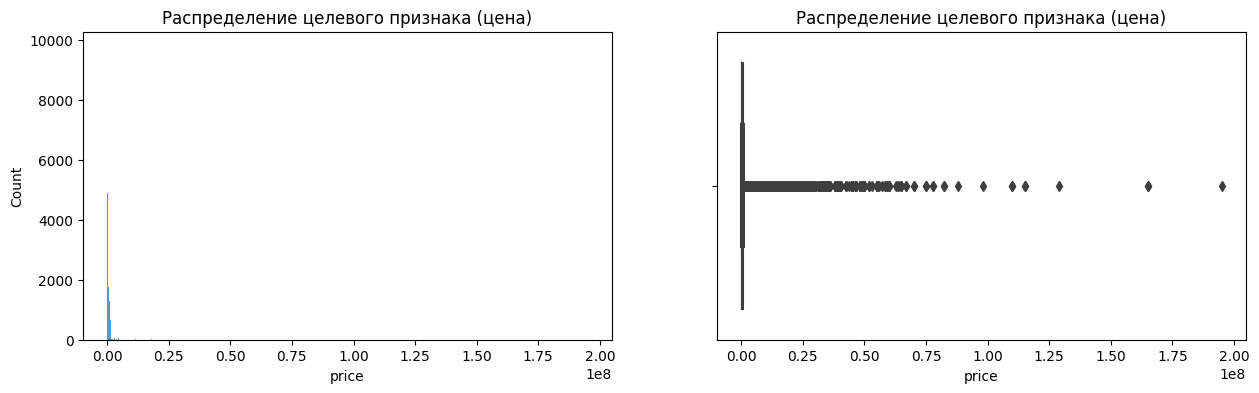

In [34]:
price = data_cleaned['price']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=price, x=price, ax=axes[0])
histplot.set_title('Распределение целевого признака (цена)')
boxplot = sns.boxplot(data=price, x=price, ax=axes[1])
boxplot.set_title('Распределение целевого признака (цена)')

Распределение целевого признац=ка (цены) лог-нормальное с возможно большим количеством выбросов.

Text(0.5, 1.0, 'Распределение целевого признака (цена)')

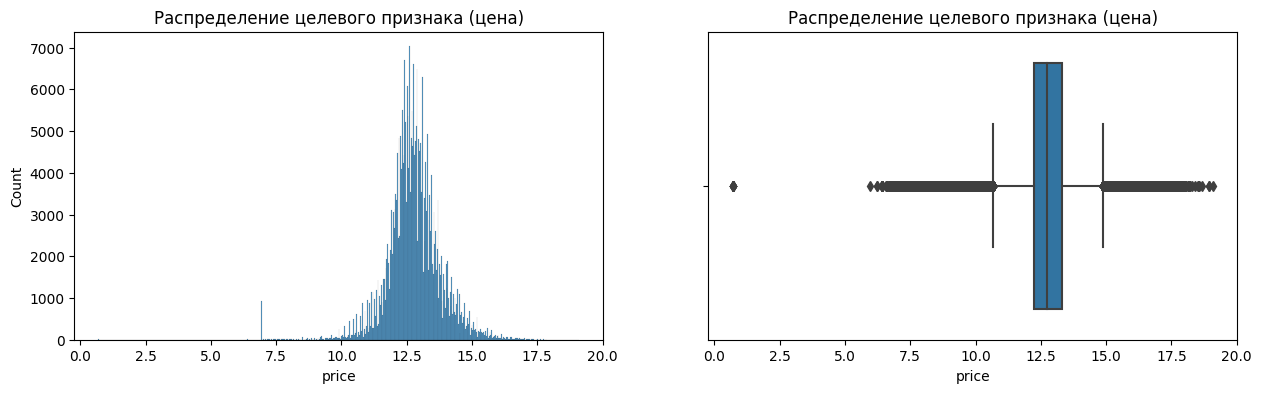

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=price, x=np.log(price+1), ax=axes[0])
histplot.set_title('Распределение целевого признака (цена)')
boxplot = sns.boxplot(data=price, x=np.log(price+1), ax=axes[1])
boxplot.set_title('Распределение целевого признака (цена)')

Графики подтверждают лог-нормальное распределение.

In [36]:
#Удаляем выбросы

def outliers_z_score_mod(data, feature, left=3, right=3, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_z_score_mod(data_cleaned, 'price', left=3, right=3, log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 4170
Результирующее число записей: 305241


Аналогичная картина с количеством лестниц, количеством ванныхкомнат, спален, площади и размера лота. Повторяем действия.

In [37]:
data_cleaned = cleaned

In [38]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305241 entries, 0 to 377184
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   status              305241 non-null  object 
 1   propertyType        305241 non-null  object 
 2   fireplace           305241 non-null  float64
 3   pool                305241 non-null  int64  
 4   final_story_number  305241 non-null  float64
 5   street_type         305241 non-null  object 
 6   baths_number        305241 non-null  float64
 7   sq                  305241 non-null  float64
 8   city_type           305241 non-null  object 
 9   is_capital          305241 non-null  int64  
 10  beds_number         305241 non-null  float64
 11  mls                 305241 non-null  float64
 12  state_hh_income     305241 non-null  float64
 13  price               305241 non-null  float64
 14  Year built          305241 non-null  int64  
 15  Remodeled year      305241 non-nul

In [39]:
final_story_number = data_cleaned['final_story_number']
baths_number = data_cleaned['baths_number']
sq = data_cleaned['sq']
beds_number = data_cleaned['beds_number']
lotsize = data_cleaned['lotsize']
year_built = data_cleaned['Year built']
remodeled_year = data_cleaned['Remodeled year']

Text(0.5, 1.0, 'Распределение final_story_number')

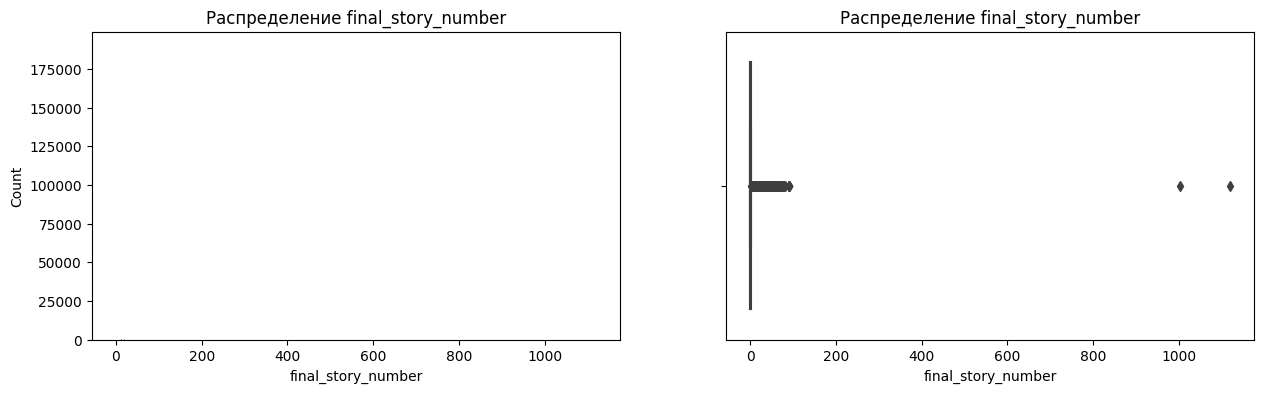

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=final_story_number, x=final_story_number, ax=axes[0])
histplot.set_title('Распределение final_story_number')
boxplot = sns.boxplot(data=final_story_number, x=final_story_number, ax=axes[1])
boxplot.set_title('Распределение final_story_number')

Text(0.5, 1.0, 'Распределение final_story_number')

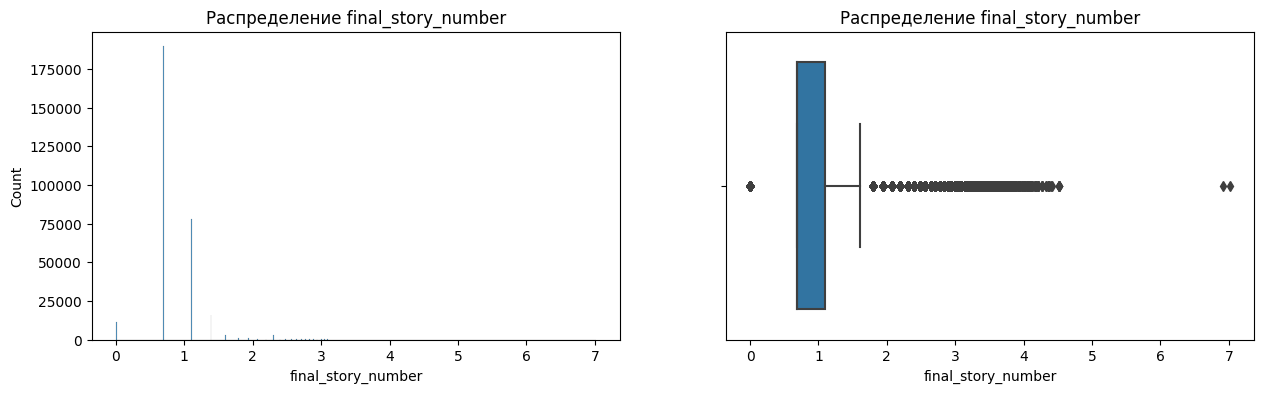

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=final_story_number, x=np.log(final_story_number+1), ax=axes[0])
histplot.set_title('Распределение final_story_number')
boxplot = sns.boxplot(data=final_story_number, x=np.log(final_story_number+1), ax=axes[1])
boxplot.set_title('Распределение final_story_number')

In [42]:
#Удаляем выбросы

outliers, cleaned = outliers_z_score_mod(data_cleaned, 'final_story_number', left=3, right=3, log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 5688
Результирующее число записей: 299553


In [43]:
data_cleaned = cleaned

In [44]:
# Дополнительно удаляем все наблюдения, где количество лестниц больше 6
data_cleaned = data_cleaned[data_cleaned['final_story_number']<6]

Text(0.5, 1.0, 'Распределение baths_number')

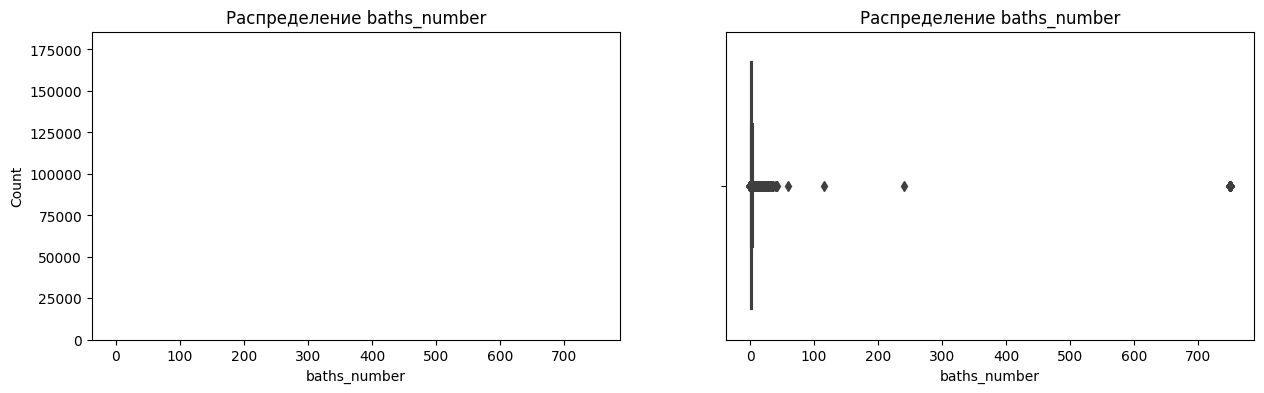

In [45]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=baths_number, x=baths_number, ax=axes[0])
histplot.set_title('Распределение baths_number')
boxplot = sns.boxplot(data=baths_number, x=baths_number, ax=axes[1])
boxplot.set_title('Распределение baths_number')

Text(0.5, 1.0, 'Распределение baths_number')

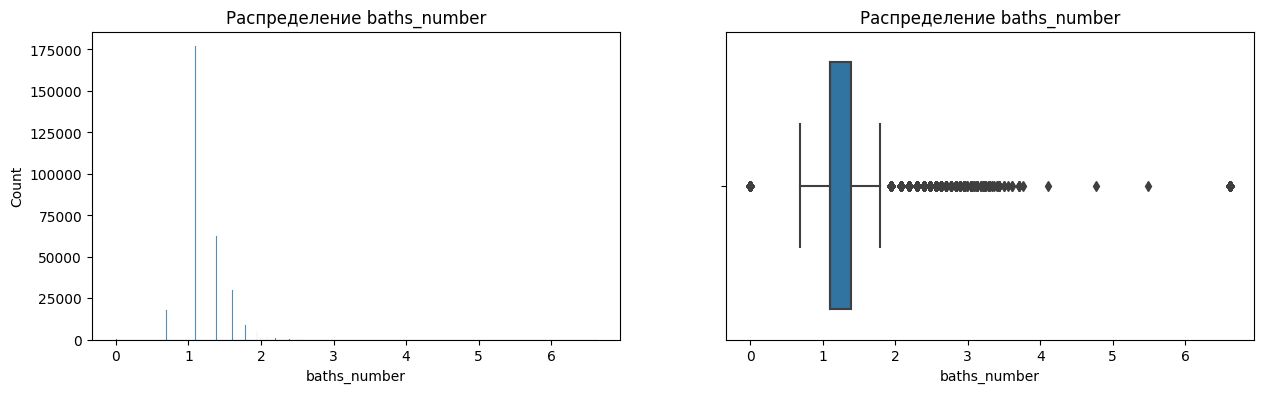

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=baths_number, x=np.log(baths_number+1), ax=axes[0])
histplot.set_title('Распределение baths_number')
boxplot = sns.boxplot(data=baths_number, x=np.log(baths_number+1), ax=axes[1])
boxplot.set_title('Распределение baths_number')

In [47]:
#Удаляем выбросы

outliers, cleaned = outliers_z_score_mod(data_cleaned, 'baths_number', left=3, right=3, log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 2525
Результирующее число записей: 296074


In [48]:
data_cleaned = cleaned

In [49]:
# Построение графика очень ресурсоемкое, поэтому отключено.

#fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
#histplot = sns.histplot(data=sq, x=sq, ax=axes[0])
#histplot.set_title('Распределение sq')
#boxplot = sns.boxplot(data=sq, x=sq, ax=axes[1])
#boxplot.set_title('Распределение sq')

Text(0.5, 1.0, 'Распределение sq')

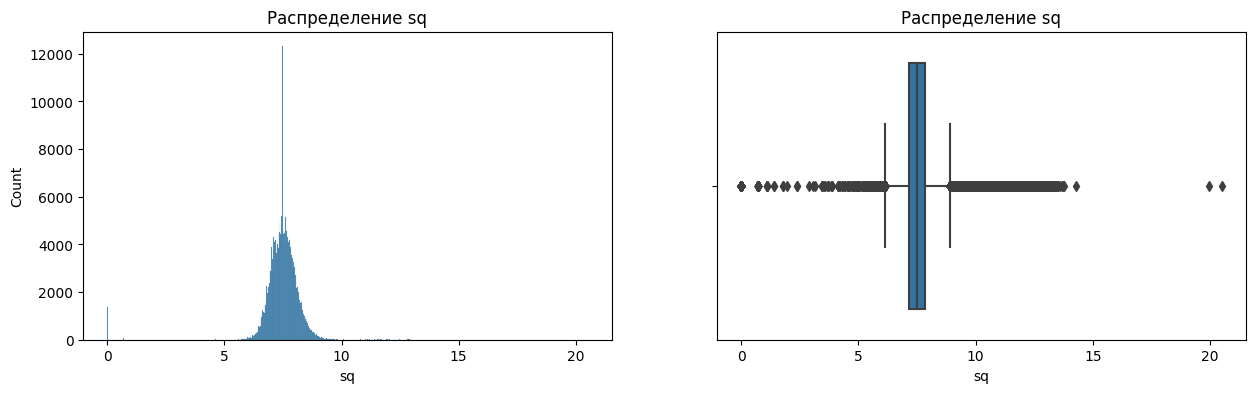

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=sq, x=np.log(sq+1), ax=axes[0])
histplot.set_title('Распределение sq')
boxplot = sns.boxplot(data=sq, x=np.log(sq+1), ax=axes[1])
boxplot.set_title('Распределение sq')

In [51]:
#Удаляем выбросы

outliers, cleaned = outliers_z_score_mod(data_cleaned, 'sq', left=3, right=3, log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 2063
Результирующее число записей: 294011


In [52]:
data_cleaned = cleaned

Text(0.5, 1.0, 'Распределение beds_number')

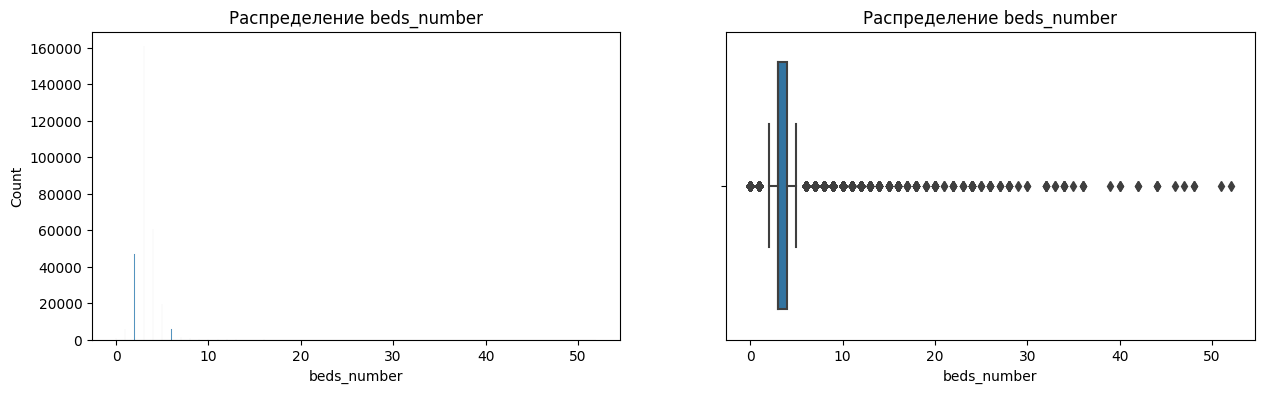

In [53]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=beds_number, x=beds_number, ax=axes[0])
histplot.set_title('Распределение beds_number')
boxplot = sns.boxplot(data=beds_number, x=beds_number, ax=axes[1])
boxplot.set_title('Распределение beds_number')

Text(0.5, 1.0, 'Распределение beds_number')

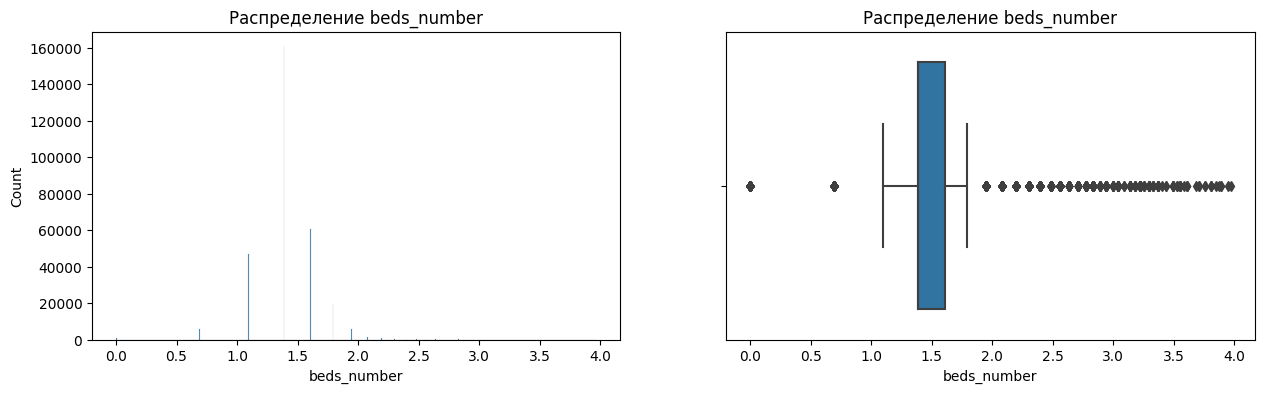

In [54]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=beds_number, x=np.log(beds_number+1), ax=axes[0])
histplot.set_title('Распределение beds_number')
boxplot = sns.boxplot(data=beds_number, x=np.log(beds_number+1), ax=axes[1])
boxplot.set_title('Распределение beds_number')

In [55]:
#Удаляем выбросы

outliers, cleaned = outliers_z_score_mod(data_cleaned, 'beds_number', left=3, right=3, log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 2655
Результирующее число записей: 291356


In [56]:
data_cleaned = cleaned

In [57]:
# Построение графика очень ресурсоемкое, поэтому отключено.
 
#fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
#histplot = sns.histplot(data=lotsize, x=lotsize, ax=axes[0])
#histplot.set_title('Распределение lotsize')
#boxplot = sns.boxplot(data=lotsize, x=lotsize, ax=axes[1])
#boxplot.set_title('Распределение lotsize')

Text(0.5, 1.0, 'Распределение lotsize')

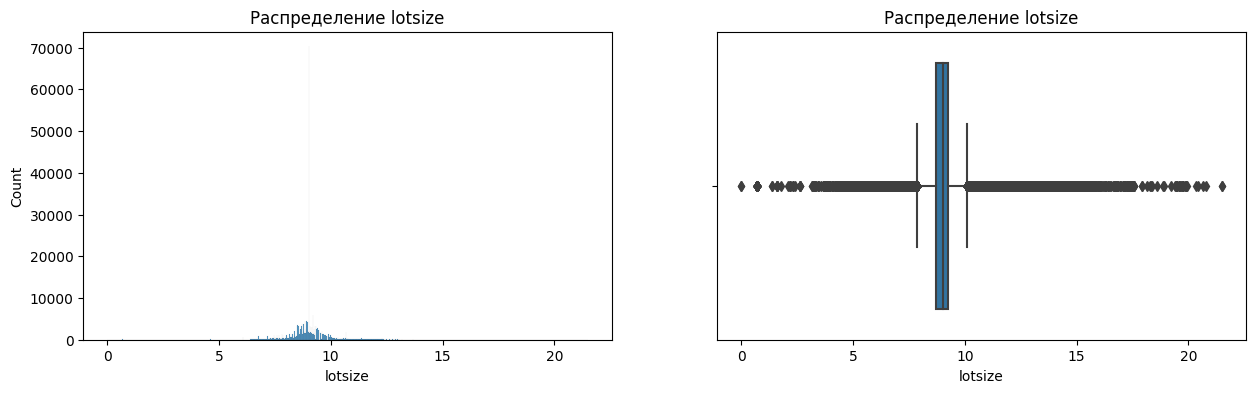

In [58]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=lotsize, x=np.log(lotsize+1), ax=axes[0])
histplot.set_title('Распределение lotsize')
boxplot = sns.boxplot(data=lotsize, x=np.log(lotsize+1), ax=axes[1])
boxplot.set_title('Распределение lotsize')

In [59]:
#Удаляем выбросы

outliers, cleaned = outliers_z_score_mod(data_cleaned, 'lotsize', left=3, right=3, log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 5961
Результирующее число записей: 285394


In [60]:
data_cleaned = cleaned

In [62]:
# Построение графика очень ресурсоемкое, поэтому отключено.

#fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
#histplot = sns.histplot(data=year_built, x=year_built, ax=axes[0])
#histplot.set_title('Распределение Year built')
#boxplot = sns.boxplot(data=year_built, x=year_built, ax=axes[1])
#boxplot.set_title('Распределение Year built')

In [63]:
#Удаляем выбросы

outliers, cleaned = outliers_z_score_mod(data_cleaned, 'Year built', left=2, right=3, log_scale=False)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 2
Результирующее число записей: 285392


In [64]:
data_cleaned = cleaned

In [66]:
# Построение графика очень ресурсоемкое, поэтому отключено.

#fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
#histplot = sns.histplot(data=remodeled_year, x=remodeled_year, ax=axes[0])
#histplot.set_title('Распределение Remodeled year')
#boxplot = sns.boxplot(data=remodeled_year, x=remodeled_year, ax=axes[1])
#boxplot.set_title('Распределение Remodeled year')

In [67]:
#Удаляем выбросы

outliers, cleaned = outliers_z_score_mod(data_cleaned, 'Remodeled year', left=2, right=3, log_scale=False)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 11379
Результирующее число записей: 274013


In [68]:
data_cleaned = cleaned

In [69]:
#Удаляем выбросы

outliers, cleaned = outliers_z_score_mod(data_cleaned, 'number_of_schools', left=3, right=3, log_scale=False)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

data_cleaned = cleaned

upper_bound_df = data_cleaned[data_cleaned['school_av_distance']!='No schools']
upper_bound_df['school_av_distance'] = upper_bound_df['school_av_distance'].apply(lambda x: float(x))
upper_bound = upper_bound_df['school_av_distance'].mean() + 3*upper_bound_df['school_av_distance'].std()
data_cleaned['school_av_distance'] = data_cleaned['school_av_distance'].apply(lambda x: x if x!='No schools' else upper_bound)
data_cleaned['school_av_distance'] = data_cleaned['school_av_distance'].apply(lambda x: float(x))

outliers, cleaned = outliers_z_score_mod(data_cleaned, 'school_av_distance', left=3, right=3, log_scale=False)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

data_cleaned = cleaned

outliers, cleaned = outliers_z_score_mod(data_cleaned, 'number_of_grades', left=3, right=3, log_scale=False)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

data_cleaned = cleaned

data_cleaned.shape

Число выбросов по методу z-отклонения: 2975
Результирующее число записей: 271038
Число выбросов по методу z-отклонения: 198
Результирующее число записей: 270840
Число выбросов по методу z-отклонения: 2616
Результирующее число записей: 268224


(268224, 24)

После очистки от выбросов в выборке осталось 268 224 наблюдений

Часть признаков уже закодированы. Среди них fireplace, pool, is_capital, heating_cat, cooling_cat, parking_cat закодированы двоичным кодированием. Такие признаки как status, propertyType, school_av_rating, street_type необходимо предварительно обработать для дальнейшего кодирования. Признак city_type можно кодировать без предварительной обработки.

In [70]:
data_cleaned['school_av_rating'] = data_cleaned['school_av_rating'].apply(lambda x: x if x!='No schools' else 0)
data_cleaned['school_av_rating'] = data_cleaned['school_av_rating'].apply(lambda x: int(x))
data_cleaned['state_hh_income'] = data_cleaned['state_hh_income'].apply(lambda x: int(x))

In [71]:
def get_status_cat(status):
    status_list = ['For sale', 'Active', 'Pending', 'New construction', 'foreclosure', 'Pre-foreclosure', 'Under Contract Show', 'Auction']
    if status in status_list:
        return status
    else: return 'Other'

data_cleaned['status'] = data_cleaned['status'].apply(get_status_cat)

In [72]:
def get_property_type_cat(property_type):
    property_type_list = ['Single Family', 'Condo', 'Townhouse', 'Multi Family', 'Traditional', 'Mobile / Manufactured', 'lot/land', 'Ranch', 'Cooperative', 'High Rise', 'Contemporary']
    if property_type in property_type_list:
        return property_type
    else: return 'Other'

data_cleaned['propertyType'] = data_cleaned['propertyType'].apply(get_property_type_cat)

In [73]:
def get_street_type_cat(street_type):
    street_type_list = ['St', 'Dr', 'Ave', 'Rd', 'Ln', 'Ct', 'Pl']
    if street_type in street_type_list:
        return street_type
    else: return 'Other'

data_cleaned['street_type'] = data_cleaned['street_type'].apply(get_street_type_cat)

In [74]:
data_coded = pd.get_dummies(data_cleaned, columns=['status', 'propertyType', 'street_type', 'city_type', 'state_hh_income'])

In [75]:
data_coded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268224 entries, 0 to 377184
Data columns (total 59 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   fireplace                           268224 non-null  float64
 1   pool                                268224 non-null  int64  
 2   final_story_number                  268224 non-null  float64
 3   baths_number                        268224 non-null  float64
 4   sq                                  268224 non-null  float64
 5   is_capital                          268224 non-null  int64  
 6   beds_number                         268224 non-null  float64
 7   mls                                 268224 non-null  float64
 8   price                               268224 non-null  float64
 9   Year built                          268224 non-null  int64  
 10  Remodeled year                      268224 non-null  int64  
 11  lotsize                   

# 5. Стандартизация, нормализация и корреляционный анализ

In [77]:
# проводим тест Шапиро — Уилка для проверки на нормальность
columns = [
    'final_story_number',
    'baths_number',
    'sq',
    'beds_number',
    'lotsize',
    'school_av_distance',
    'Year built',
    'Remodeled year',
    'school_av_rating',
    'number_of_schools',
    'number_of_grades'
    ]

alpha = 0.05 

for column in columns:
    _, p = stats.shapiro(data_coded[column])
    
    if p <= alpha:
        print(column+' Распределение не нормальное')
    else:
        print(column+' Распределение нормальное')

final_story_number Распределение не нормальное
baths_number Распределение не нормальное
sq Распределение не нормальное
beds_number Распределение не нормальное
lotsize Распределение не нормальное
school_av_distance Распределение не нормальное
Year built Распределение не нормальное
Remodeled year Распределение не нормальное
school_av_rating Распределение не нормальное
number_of_schools Распределение не нормальное
number_of_grades Распределение не нормальное


In [78]:
scaler = StandardScaler()

data_coded['final_story_number_norm'] = scaler.fit_transform(data_coded[['final_story_number']])
data_coded['baths_number_norm'] = scaler.fit_transform(data_coded[['baths_number']])
data_coded['sq_norm'] = scaler.fit_transform(data_coded[['sq']])
data_coded['beds_number_norm'] = scaler.fit_transform(data_coded[['beds_number']])
data_coded['lotsize_norm'] = scaler.fit_transform(data_coded[['lotsize']])
data_coded['school_av_distance_norm'] = scaler.fit_transform(data_coded[['school_av_distance']])
data_coded['Year built_norm'] = scaler.fit_transform(data_coded[['Year built']])
data_coded['Remodeled year_norm'] = scaler.fit_transform(data_coded[['Remodeled year']])
data_coded['school_av_rating_norm'] = scaler.fit_transform(data_coded[['school_av_rating']])
data_coded['number_of_schools_norm'] = scaler.fit_transform(data_coded[['number_of_schools']])
data_coded['number_of_grades_norm'] = scaler.fit_transform(data_coded[['number_of_grades']])

#data_coded['price_norm'] = scaler.fit_transform(data_coded[['price_norm']])

In [79]:
data_norm = data_coded.drop(columns=[
    'final_story_number',
    'baths_number',
    'sq',
    'beds_number',
    'lotsize',
    'school_av_distance',
    'Year built',
    'Remodeled year',
    'school_av_rating',
    'number_of_schools',
    'number_of_grades'
    ])

In [80]:
corr = data_norm.corr()
corr_list = []
for col in corr.columns:
    for row in corr.index:
        if col != row and abs(corr[col].loc[row]) > 0.7:
            corr_list.append([col, row, corr[col].loc[row]])

corr_list = pd.DataFrame(corr_list)
display (corr_list)

,0,1,2
0,status_Active,status_For sale,-0.806633
1,status_For sale,status_Active,-0.806633
2,city_type_Big city,city_type_Small city,-0.812638
3,city_type_Small city,city_type_Big city,-0.812638
4,Year built_norm,Remodeled year_norm,1.000000
5,Remodeled year_norm,Year built_norm,1.000000
6,number_of_schools_norm,number_of_grades_norm,0.997150
7,number_of_grades_norm,number_of_schools_norm,0.997150


<AxesSubplot: >

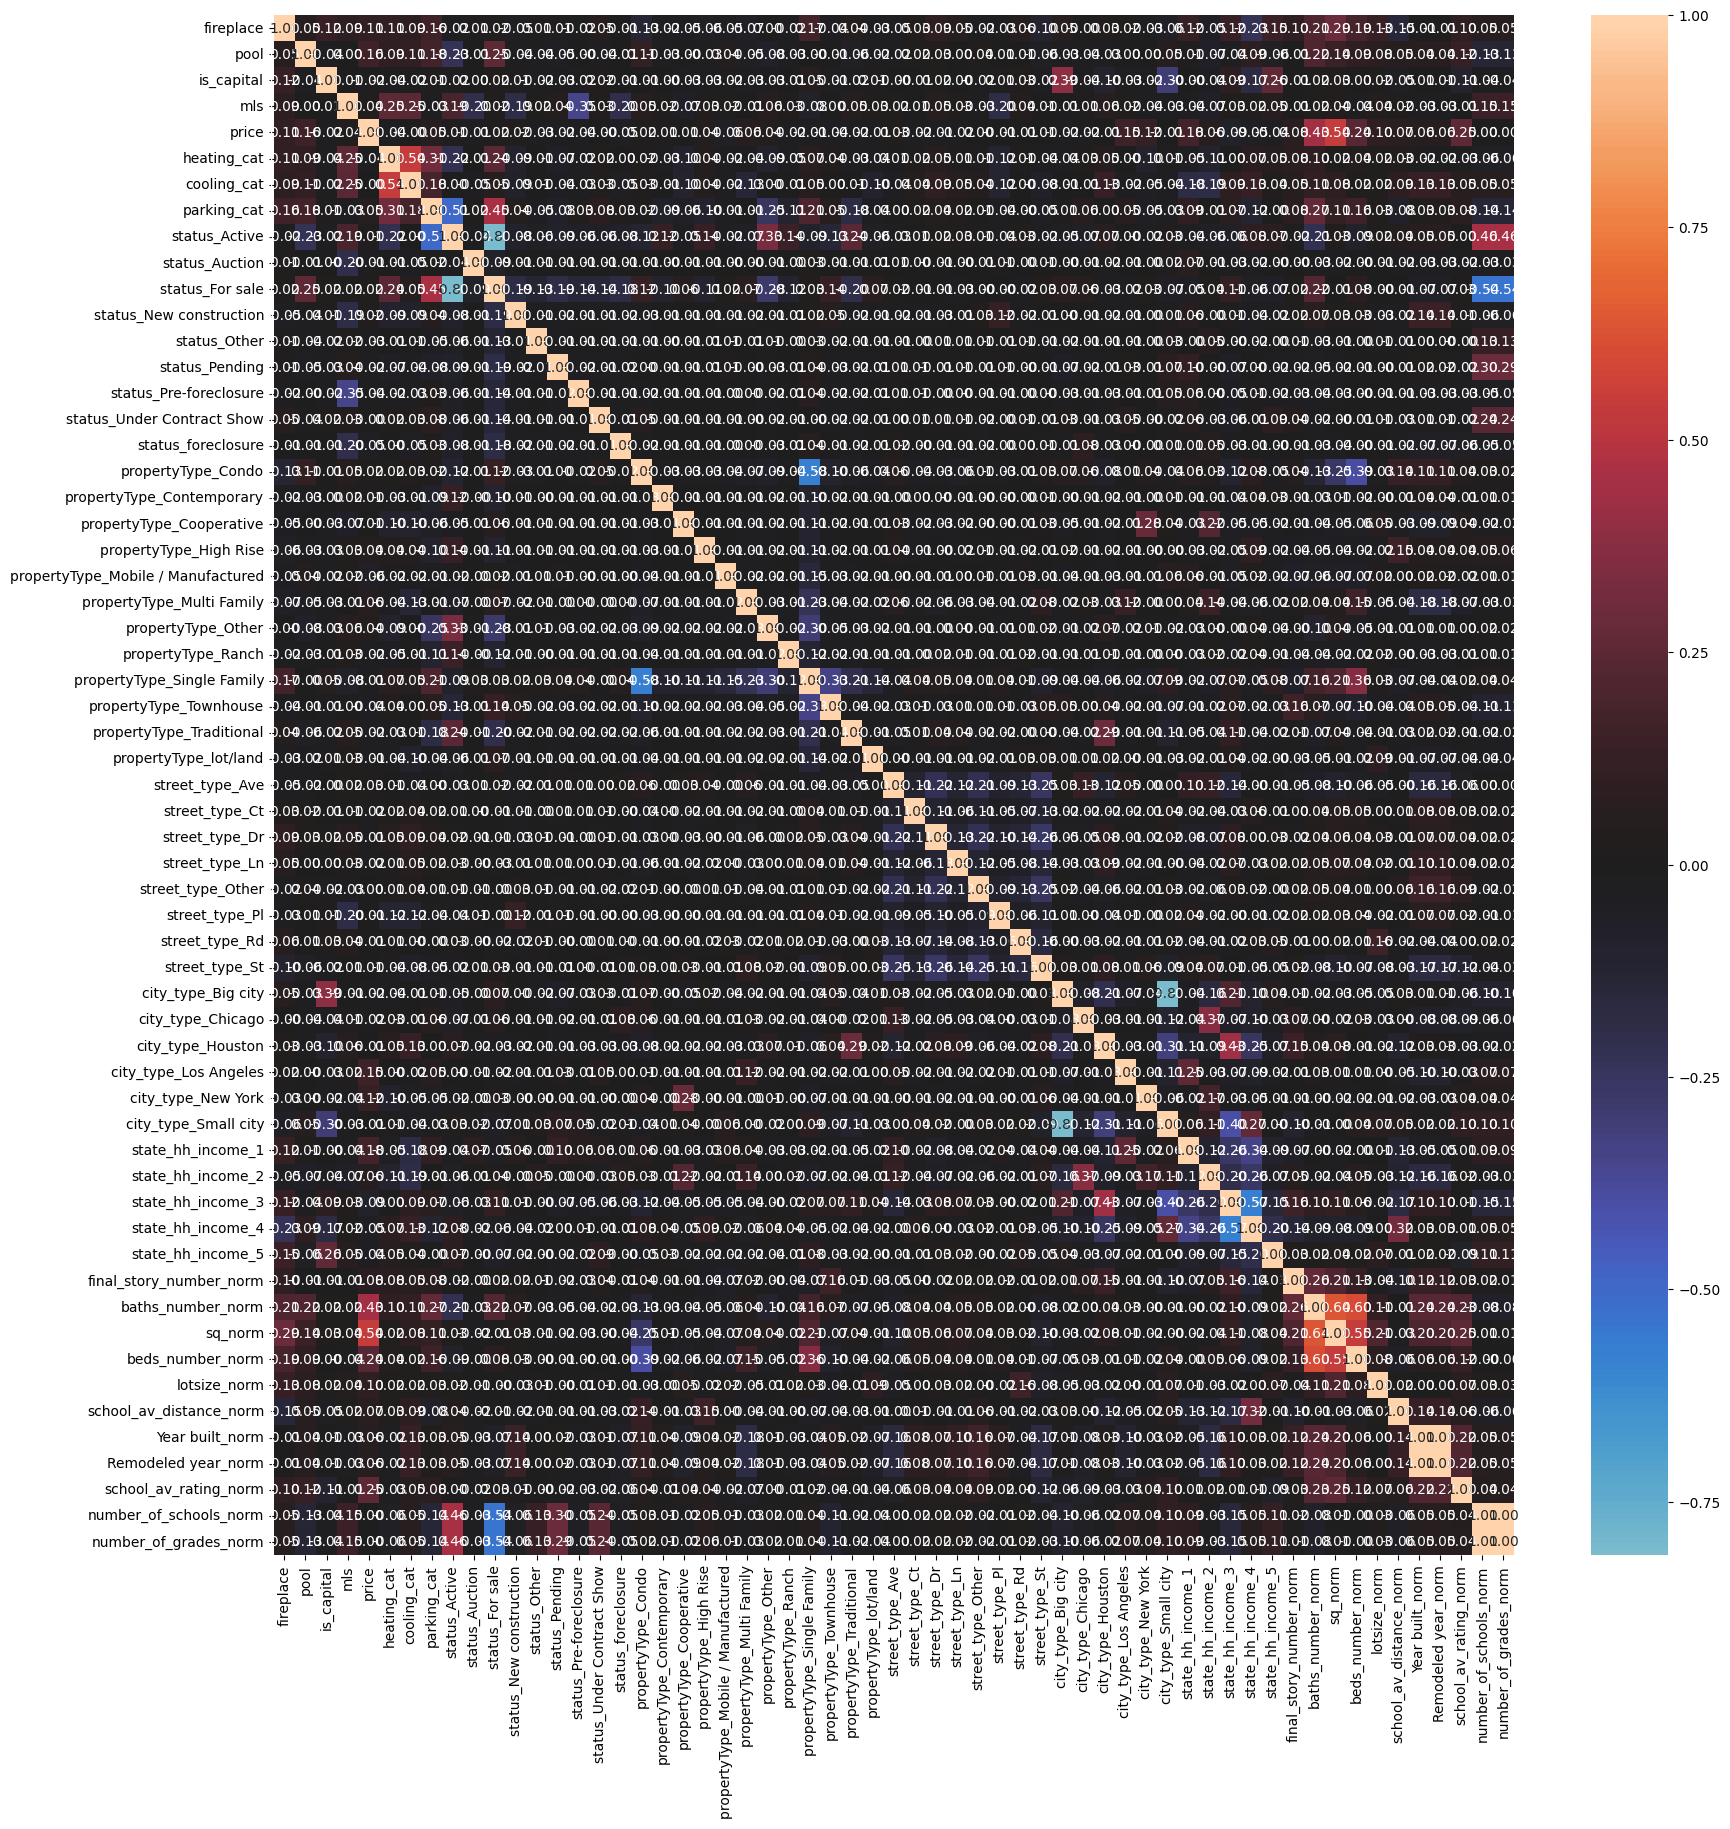

In [81]:
plt.figure(figsize=(20,20))  
sns.heatmap(data_norm.corr(),fmt='.2f',annot=True, center=0)

In [82]:
data_try = data_norm.drop(columns=[
    'status_Active',
    'city_type_Big city',
    'Remodeled year_norm',
    'number_of_grades_norm'
    ])

В рамках раздела были проведены статистические тесты на нормальность, нормализованы значение количественных признаков, проведен корреляционный анализ и удалены gризнаки с высокой взаимной корелляцией.

# 6. Построение модели

Для выбора оптимальной модели и оценки качества ее работы будут построены 4 вида моделей:

* LinearRegression
* DecisionTreeRegressor
* RandomForestRegressor
* GradientBoostingRegressor

В задании не была указана целевая метрика и ее пороговое значение, в свзи с этим мною было принято решение использовать RMSLE (Root Mean Squared Log Error), для чего необходимо логарифмировать целевую переменную.

In [83]:
data_try['price_log'] = np.log(data_try['price']+1)

In [84]:
X = data_try.drop(['price', 'price_log'], axis=1)
y = data_try['price']
y_log = data_try['price_log']

In [85]:
num_cols = ['sq_norm',
            'lotsize_norm',
            'school_av_distance_norm',
            'final_story_number_norm',
            'baths_number_norm',
            'beds_number_norm',
            'Year built_norm',
            'school_av_rating_norm',
            'number_of_schools_norm'
            ]

cat_cols = ['fireplace',
            'pool',
            'is_capital',
            'mls',
            'heating_cat',
            'cooling_cat',
            'parking_cat',
            'status_Auction',
            'status_For sale',
            'status_New construction' ,
            'status_Other',
            'status_Pending',
            'status_Pre-foreclosure',
            'status_Under Contract Show',
            'status_foreclosure',
            'propertyType_Condo',
            'propertyType_Contemporary',
            'propertyType_Cooperative',
            'propertyType_High Rise',
            'propertyType_Mobile / Manufactured',
            'propertyType_Multi Family',
            'propertyType_Other',
            'propertyType_Ranch',
            'propertyType_Single Family',
            'propertyType_Townhouse',
            'propertyType_Traditional',
            'propertyType_lot/land',
            'street_type_Ave',
            'street_type_Ct',
            'street_type_Dr',
            'street_type_Ln',
            'street_type_Other',
            'street_type_Pl',
            'street_type_Rd',
            'street_type_St',
            'city_type_Chicago',
            'city_type_Houston',
            'city_type_Los Angeles',
            'city_type_New York',
            'city_type_Small city',
            'state_hh_income_1',
            'state_hh_income_2',
            'state_hh_income_3',
            'state_hh_income_4',
            'state_hh_income_5'
            ]

<AxesSubplot: >

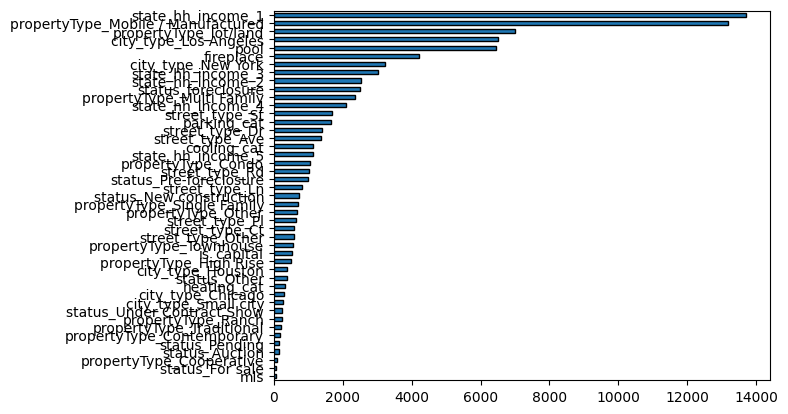

In [86]:
# Анализ начимости категориальных признаков
imp_cat = pd.Series(chi2(X[cat_cols], (y_log.astype('int')))[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

<AxesSubplot: >

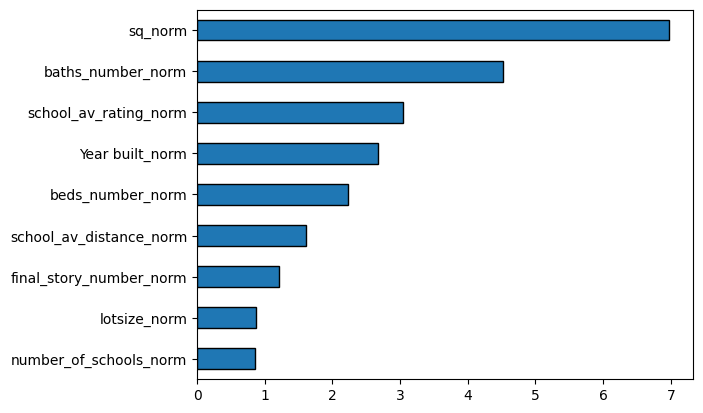

In [87]:
# Анализ начимости количественных признаков
imp_num = pd.Series(f_classif(X[num_cols], y_log)[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

In [88]:
select = SelectKBest(score_func=f_regression, k=25)
z = select.fit_transform(X, y_log)

filter = select.get_support()
features = X.columns
factors = features[filter]
    
X = X[factors]

In [89]:
# Разделяем выборку на обучающую и тестовую
X_train, X_test, y_train_log, y_test_log = model_selection.train_test_split(
    X, y_log, 
    test_size=0.4, 
    random_state=42
)

# Дополнительно разделяем тестовую вырборку на валюидационную и тестовую для тестирования параметров модели
X_valid, X_test, y_valid_log, y_test_log = model_selection.train_test_split(
    X_test, y_test_log, 
    test_size=0.5, 
    random_state=42
)

In [90]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train, y_train_log)
y_train_log_predict = lin_reg.predict(X_train)
y_valid_log_predict = lin_reg.predict(X_valid)

mse = mean_squared_error(y_train_log, y_train_log_predict)**0.5
print(round(mse,2))
mse = mean_squared_error(y_valid_log, y_valid_log_predict)**0.5
print(round(mse,2))

0.57
0.57


In [91]:
dt = tree.DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train_log)
y_train_log_predict = dt.predict(X_train)
y_valid_log_predict = dt.predict(X_valid)

mse = mean_squared_error(y_train_log, y_train_log_predict)**0.5
print(round(mse,2))
mse = mean_squared_error(y_valid_log, y_valid_log_predict)**0.5
print(round(mse,2))

0.01
0.6


Обе модели показали слабые результаты на валидационной выборке. Дерево решений оказалось сильно переобученным.

In [92]:
depth = [7,8,9,10,11,12,13,14,15,16,17,18,19,20]
for i in depth:
    print(f'max depth = {i}')
    dt = tree.DecisionTreeRegressor(random_state=42, max_depth=i)
    dt.fit(X_train, y_train_log)
    y_train_log_predict = dt.predict(X_train)
    y_valid_log_predict = dt.predict(X_valid)
    mse = mean_squared_error(y_train_log, y_train_log_predict)**0.5
    print(round(mse,3))
    mse = mean_squared_error(y_valid_log, y_valid_log_predict)**0.5
    print(round(mse,3))

max depth = 7
0.571
0.575
max depth = 8
0.551
0.557
max depth = 9
0.533
0.545
max depth = 10
0.515
0.532
max depth = 11
0.497
0.524
max depth = 12
0.478
0.52
max depth = 13
0.458
0.519
max depth = 14
0.437
0.516
max depth = 15
0.415
0.52
max depth = 16
0.391
0.524
max depth = 17
0.367
0.53
max depth = 18
0.341
0.536
max depth = 19
0.316
0.541
max depth = 20
0.291
0.547


Лучшая метрика на валидационной выборке у решаующего дерева 0.516 при количетсвте деревьев 14. Используем это значение для дальнейшего сравнения моделей.

In [93]:
regr = RandomForestRegressor(max_depth=14, n_estimators=100, random_state=42, criterion = 'friedman_mse', min_samples_split = 30)
regr.fit(X_train, y_train_log)
y_train_log_predict = regr.predict(X_train)
y_valid_log_predict = regr.predict(X_valid)

mse = mean_squared_error(y_train_log, y_train_log_predict)**0.5
print(round(mse,2))
mse = mean_squared_error(y_valid_log, y_valid_log_predict)**0.5
print(round(mse,2))

0.43
0.47


У ансамблевой модели на основе решающих деревьев результат метрики на валидационной выборке стал лучше - 0.47.

In [94]:
gb = GradientBoostingRegressor(
    max_depth=14,
    n_estimators=100,
    learning_rate = 0.5,
    min_samples_split = 30,
    random_state=42
)

gb.fit(X_train, y_train_log)
y_train_log_predict1 = gb.predict(X_train)
y_valid_log_predict1 = gb.predict(X_valid)

mse = mean_squared_error(y_train_log, y_train_log_predict1)**0.5
print(round(mse,2))
mse = mean_squared_error(y_valid_log, y_valid_log_predict1)**0.5
print(round(mse,2))

0.18
0.45


У ансамблевой модели на основе градиентного бустинга метрика стала лучше - 0.45. В дальнейшем подбираем параметры модели для ансамбля на основе градиентного бустинга.

In [101]:
max_depths=[12,14,16]
n_estimatorses=[80,100,120]
learning_rates=[0.3,0.4,0.5]
min_samples_splites=[25,30,45]
mse_test_min=1
count=0

for max_depth in max_depths:
    for n_estimators in n_estimatorses:
        for learning_rate in learning_rates:
            for min_samples_split in min_samples_splites:
                gb = GradientBoostingRegressor(
                    max_depth=max_depth,
                    n_estimators=n_estimators,
                    learning_rate = learning_rate,
                    min_samples_split = min_samples_split,
                    random_state=42
                    )
                gb.fit(X_train, y_train_log)
            
                y_test_log_predict1 = gb.predict(X_test)
                
                mse_test = mean_squared_error(y_test_log, y_test_log_predict1)**0.5
                
                count+=1
                print('{}/81 RMSLE: {}'.format(count, round(mse_test,2)))
                
                if mse_test < mse_test_min:
                    mse_test_min = mse_test
                    max_depth_best = max_depth
                    n_estimators_best = n_estimators
                    learning_rate_best = learning_rate
                    min_samples_split_best = min_samples_split

print('Лучший RMSLE:',round(mse_test_min,2))
print('Параметры модели:')
print('    max_depth:',max_depth_best) 
print('    n_estimators:',n_estimators_best) 
print('    learning_rate:',learning_rate_best) 
print('    min_samples_split:',min_samples_split_best) 

1/81 RMSLE: 0.43
2/81 RMSLE: 0.43
3/81 RMSLE: 0.43
4/81 RMSLE: 0.43
5/81 RMSLE: 0.43
6/81 RMSLE: 0.43
7/81 RMSLE: 0.45
8/81 RMSLE: 0.45
9/81 RMSLE: 0.44
10/81 RMSLE: 0.42
11/81 RMSLE: 0.42
12/81 RMSLE: 0.43
13/81 RMSLE: 0.43
14/81 RMSLE: 0.43
15/81 RMSLE: 0.43
16/81 RMSLE: 0.45
17/81 RMSLE: 0.45
18/81 RMSLE: 0.45
19/81 RMSLE: 0.42
20/81 RMSLE: 0.42
21/81 RMSLE: 0.43
22/81 RMSLE: 0.43
23/81 RMSLE: 0.43
24/81 RMSLE: 0.43
25/81 RMSLE: 0.45
26/81 RMSLE: 0.45
27/81 RMSLE: 0.45
28/81 RMSLE: 0.43
29/81 RMSLE: 0.43
30/81 RMSLE: 0.42
31/81 RMSLE: 0.44
32/81 RMSLE: 0.44
33/81 RMSLE: 0.44
34/81 RMSLE: 0.45
35/81 RMSLE: 0.45
36/81 RMSLE: 0.45
37/81 RMSLE: 0.43
38/81 RMSLE: 0.43
39/81 RMSLE: 0.42
40/81 RMSLE: 0.44
41/81 RMSLE: 0.44
42/81 RMSLE: 0.44
43/81 RMSLE: 0.45
44/81 RMSLE: 0.45
45/81 RMSLE: 0.45
46/81 RMSLE: 0.43
47/81 RMSLE: 0.42
48/81 RMSLE: 0.42
49/81 RMSLE: 0.44
50/81 RMSLE: 0.44
51/81 RMSLE: 0.44
52/81 RMSLE: 0.45
53/81 RMSLE: 0.45
54/81 RMSLE: 0.45
55/81 RMSLE: 0.43
56/81 RMSLE: 0.42
5

# 7. Выводы

В рамках работы проведены все основные этапа работы в DS и разработана модель предсказания цены на объекты недвижимости.
Качество модели соответствует заданным критериям при определенных параметрах модели.